# Existing Systems Scoring
This notebook scores current transit systems present today. (e.g. Toronto Transit Commission, Vancouver SkyTrain)

In [11]:
import numpy as np
import pandas as pd
from system_scoring import *
from get_bounds import *
from misc_utility import *
from plotting_utility import *

### Grid Points Load (output from scoring.ipynb)
Grid Points are now scored in `scoring.ipynb`.

In [12]:
YYZ_GridPoints = pd.read_csv('../res/grid_points/yyz_grid_points.csv', sep = ',')
PT_DENSITY = len(YYZ_GridPoints["lat"].unique())

### Existing Transit System Datasets

In [13]:
YYZ_ExistingSystem_Stations = pd.read_csv('../res/datasets/existing_systems/yyz.csv', sep = ',')

In [14]:
YYZ_ExistingSystem_Stations = YYZ_ExistingSystem_Stations[['X', 'Y', 'STATION', 'LINE']]
YYZ_ExistingSystem_Stations = YYZ_ExistingSystem_Stations.rename(columns={"X": "long", "Y": "lat", "STATION": "name", "LINE": "line"})
YYZ_ExistingSystem_Stations["line"] = pd.Series(YYZ_ExistingSystem_Stations["line"].factorize()[0] + 1)

In [15]:
[YYZ_UpperLatBound, YYZ_BottomLatBound, YYZ_LeftLongBound, YYZ_RightLongBound] = getBounds(YYZ_GridPoints['lat'], YYZ_GridPoints['long'], 4)

In [16]:
YYZ_ExistingSystem_StationsLatLong = [(YYZ_ExistingSystem_Stations["lat"].to_numpy(), YYZ_ExistingSystem_Stations["long"].to_numpy())]
YYZ_ExistingSystem_StationsLatLong = [snapLongToGrid(YYZ_ExistingSystem_StationsLatLong[0], YYZ_LeftLongBound, YYZ_RightLongBound, PT_DENSITY)]

In [17]:
YYZ_ExistingSystem_StationsLatLong

[(array([43.63734493, 43.64537456, 43.64825145, 43.65010203, 43.64977663,
         43.65159511, 43.65397668, 43.65550711, 43.65708609, 43.65900104,
         43.66024664, 43.6624166 , 43.66410656, 43.6656673 , 43.66729487,
         43.66828354, 43.67025512, 43.67079308, 43.67230371, 43.67392221,
         43.67671775, 43.67830949, 43.67976649, 43.68121561, 43.68278377,
         43.68428171, 43.68650521, 43.68897417, 43.69463146, 43.71116544,
         43.73245326, 43.64575948, 43.64765145, 43.64913596, 43.65083985,
         43.652381  , 43.65483294, 43.65634341, 43.65985727, 43.66138181,
         43.66524233, 43.66734632, 43.67704462, 43.68333168, 43.68827434,
         43.69804063, 43.70660856, 43.72496167, 43.7441737 , 43.76151134,
         43.7687938 , 43.77983235, 43.67032045, 43.67497147, 43.68412321,
         43.69942965, 43.70954705, 43.71592277, 43.72555601, 43.73421423,
         43.74979849, 43.76676396, 43.76918324, 43.77093105, 43.7753182 ]),
  array([-79.5409, -79.5311, -79.511

In [18]:
YYZ_GridPoints

,Unnamed: 0,lat,long,score
0,0,43.5928,-79.619300,0.00000
1,1,43.5928,-79.609486,0.00000
2,2,43.5928,-79.599671,0.00000
3,3,43.5928,-79.589857,0.00000
4,4,43.5928,-79.580043,0.04947
...,...,...,...,...
2495,2495,43.8323,-79.177657,0.00000
2496,2496,43.8323,-79.167843,0.00000
2497,2497,43.8323,-79.158029,0.00000
2498,2498,43.8323,-79.148214,0.00000


In [21]:
score, _ = scoreSystem(YYZ_GridPoints, YYZ_ExistingSystem_StationsLatLong)

In [93]:
len(YYZ_ExistingSystem_StationsLatLong)

1

<AxesSubplot:xlabel='lat', ylabel='long'>

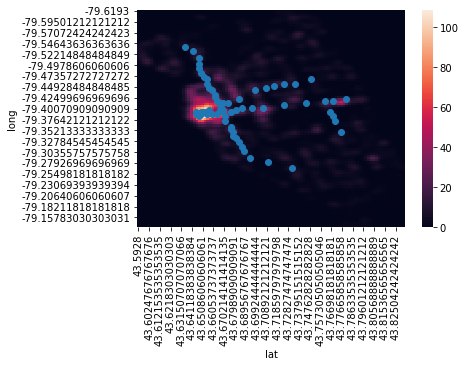

In [116]:
plotHeatmapPoints(YYZ_GridPoints, YYZ_ExistingSystem_StationsLatLong, PT_DENSITY)

In [22]:
score / len(YYZ_ExistingSystem_Stations)

0.677741319140424